In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

data = pd.read_csv("Complete_dataset.csv", sep=';')

# make numeric.
data["Perioden_Title"] = pd.to_numeric(data["Perioden_Title"])
data["gemiddelde verkoopprijs.GemiddeldeVerkoopprijs_1"] = pd.to_numeric(data["gemiddelde verkoopprijs.GemiddeldeVerkoopprijs_1"])
data["GemiddeldeBevolking_2"] = pd.to_numeric(data["GemiddeldeBevolking_2"])





In [2]:
amsterdam = data[data["RegioS_Title"] == 'Amsterdam']
amsterdam = amsterdam.sort_values("Perioden_Title", ascending=True)
#print(amsterdam[["RegioS_Title", "Perioden_Title"]])


# extract x and y values, so they can be plot.
x_values = amsterdam[["Perioden_Title"]]
y_values = amsterdam[["gemiddelde verkoopprijs.GemiddeldeVerkoopprijs_1"]]




[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021] [ 98008. 110420. 126024. 151254. 189227. 224938. 247082. 251413. 231768.
 227679. 238189. 257215. 285587. 305206. 280670. 281206. 284668. 270507.
 256308. 272438. 303925. 358976. 407670. 460751. 484995. 510919. 569890.]
mean squared error of model: 
2315990613.373285


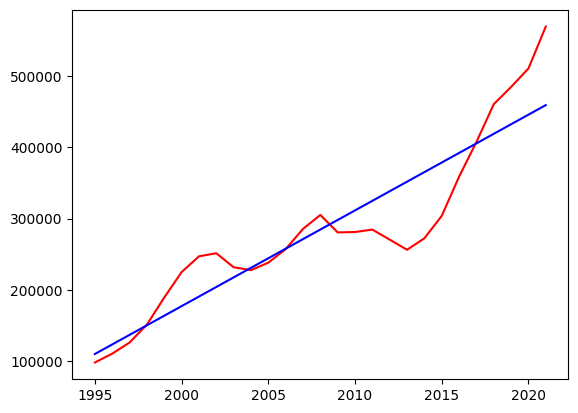

In [3]:
# Do linear regression.

#print(x_values)

reg = LinearRegression().fit(x_values, y_values)
y_pred = reg.predict(x_values)

x = np.array(x_values["Perioden_Title"])
y = np.array(y_values["gemiddelde verkoopprijs.GemiddeldeVerkoopprijs_1"])

print(x,y)
plt.plot(x, y, color="red", label="data")
plt.plot(x, y_pred, color="blue", label="pred")

print("mean squared error of model: ")
print(mean_squared_error(y, y_pred))

train: 
[[1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]] [ 98008. 110420. 126024. 151254. 189227. 224938. 247082. 251413. 231768.
 227679. 238189. 257215. 285587. 305206. 280670. 281206. 284668. 270507.
 256308. 272438. 303925. 358976. 407670. 460751.]
test: 
[2019 2020 2021] [484995. 510919. 569890.]


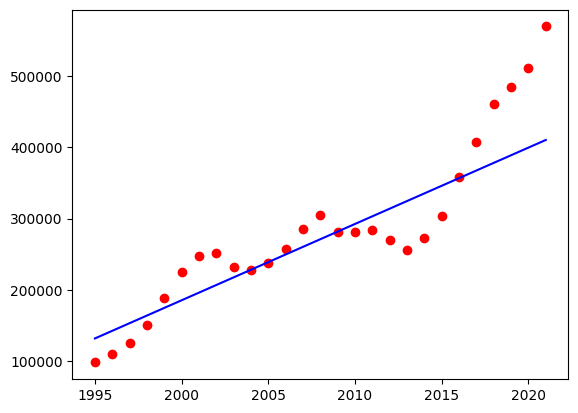

In [16]:


x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.4, shuffle = False)

x_train= x_train.reshape(-1, 1)
print("train: ")
print( x_train, y_train )

print("test: ")
print(x_test, y_test)

reg = LinearRegression().fit(x_train, y_train)

#y_pred = reg.predict(x_test.reshape(-1, 1))
y_pred = reg.predict(x.reshape(-1, 1))

#plt.plot(x_test, y_test, color="red", label="data")
plt.scatter(x, y, color="red", label="data")
plt.plot(x, y_pred, color="blue", label="pred")


In [5]:
print("mean squared error of model: ")
print(mean_squared_error(y, y_pred))

mean squared error of model: 
4352388717.336302


mean squared error of model: 
8948855485.679012


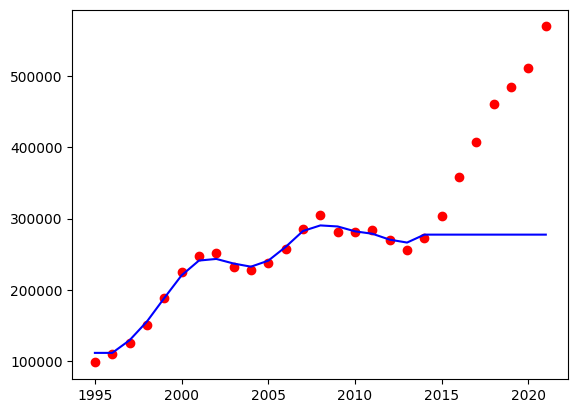

In [12]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train, y_train)

y_pred = neigh.predict(x.reshape(-1, 1))

#plt.plot(x_test, y_test, color="red", label="data")
plt.scatter(x, y, color="red", label="data")
plt.plot(x, y_pred, color="blue", label="pred")

print("mean squared error of model: ")
print(mean_squared_error(y, y_pred))